In [1]:
import sys
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
# Local
cwd = pathlib.Path().resolve()
src = cwd.parent
root = src.parent
sys.path.append(str(src))
sys.path.append(str(root))

from utils.watertopo import WaterTopo
from utils.simulation import Simulation
from utils.utils import count_parameters, mse_per_timestep

In [3]:
from models.CNNPIDPID import BasicCNN_PINN, create_sequence, train_and_validate, evaluate_model, train, punish_false_dry

In [4]:
#initialize GPU -  In case of windows use cuda instead of nps
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Is CUDA enabled?",torch.cuda.is_available())
print("Number of GPUs",torch.cuda.device_count())

Is CUDA enabled? True
Number of GPUs 1


In [5]:
model_PID = BasicCNN_PINN(input_channels=2,
                 hidden_size=64,
                 output_channels=1,
                 bias=True,
                 kernel_size=(3, 3, 3, 3), 
                 pool_kernel_size=1,
                 pool_stride=1, 
                 nonlinearity=F.relu,
                 max_dV=0.5*3600*50
                 ).to(device)

print(f"CNN --> num. trainable parameters:{count_parameters(model_PID):8d}")

CNN --> num. trainable parameters:  112577


In [6]:
# Uncomment to train the model, otherwise load the best parameters below

# model_PID, train_losses, val_losses, best_val_loss, train_time = train(model_PID,
#                                                  device=device,
#                                                  root=root,
#                                                  model_name = 'CNN/CNN_PID',
#                                                  channels=2,
#                                                  T=1,
#                                                  H=1,
#                                                  sim_amount=80,
#                                                  training_size=0.8,
#                                                  use_augmented_data=False,
#                                                  batch_size=10,
#                                                  num_epochs=20,
#                                                  lr=0.005,
#                                                  criterion=nn.MSELoss(),
#                                                  optimizer=optim.AdamW,
#                                                  )

shape of X:  (7600, 2, 64, 64)
shape of Y:  (7600, 1, 64, 64)
starting training
Epoch 1/20 Train Loss: 0.0022, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 2/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 3/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 4/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 5/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 6/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 7/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 8/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 9/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 10/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0.0004
Epoch 11/20 Train Loss: 0.0005, Validation Loss: 0.0004 Best Validation Loss: 0

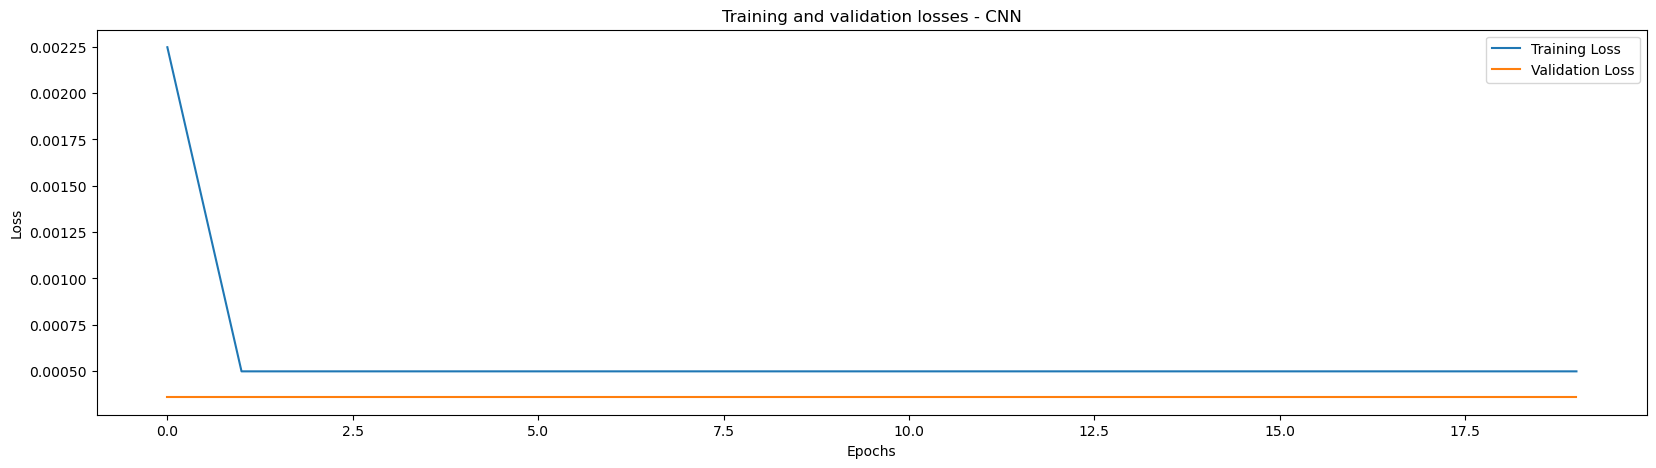

In [7]:
# # Plot validation loss
# fig, ax = plt.subplots(figsize=(20, 5))
# ax.plot(train_losses, label='Training Loss')
# ax.plot(val_losses, label='Validation Loss')
# ax.set_xlabel('Epochs')
# ax.set_ylabel('Loss')
# ax.set_title('Training and validation losses - CNN')
# ax.legend()

In [8]:
model_PIDPID = BasicCNN_PINN(input_channels=2,
                 hidden_size=64,
                 output_channels=1,
                 bias=True,
                 kernel_size=(3, 3, 3, 3), 
                 pool_kernel_size=1,
                 pool_stride=1, 
                 nonlinearity=F.relu,
                 max_dV=0.5*3600*50
                 ).to(device)

print(f"CNN --> num. trainable parameters:{count_parameters(model_PIDPID):8d}")

CNN --> num. trainable parameters:  112577


In [9]:
# Uncomment to train the model, otherwise load the best parameters below

# model_PIDPID, train_losses, val_losses, best_val_loss, train_time = train(model_PIDPID,
#                                                  device=device,
#                                                  root=root,
#                                                  model_name = 'CNN/CNN_PIDPID',
#                                                  channels=2,
#                                                  T=1,
#                                                  H=1,
#                                                  sim_amount=80,
#                                                  training_size=0.8,
#                                                  use_augmented_data=False,
#                                                  batch_size=10,
#                                                  num_epochs=20,
#                                                  lr=0.005,
#                                                  criterion=punish_false_dry,
#                                                  optimizer=optim.AdamW,
#                                                  )

shape of X:  (7600, 2, 64, 64)
shape of Y:  (7600, 1, 64, 64)
starting training
Epoch 1/20 Train Loss: 2749.3947, Validation Loss: 684.5639 Best Validation Loss: 684.5639
Epoch 2/20 Train Loss: 780.6402, Validation Loss: 669.6357 Best Validation Loss: 669.6357
Epoch 3/20 Train Loss: 758.4051, Validation Loss: 627.7700 Best Validation Loss: 627.7700
Epoch 4/20 Train Loss: 769.4393, Validation Loss: 657.0517 Best Validation Loss: 627.7700
Epoch 5/20 Train Loss: 726.1559, Validation Loss: 755.2281 Best Validation Loss: 627.7700
Epoch 6/20 Train Loss: 710.7400, Validation Loss: 602.4979 Best Validation Loss: 602.4979
Epoch 7/20 Train Loss: 710.5733, Validation Loss: 616.2690 Best Validation Loss: 602.4979
Epoch 8/20 Train Loss: 693.7190, Validation Loss: 672.7589 Best Validation Loss: 602.4979
Epoch 9/20 Train Loss: 687.9294, Validation Loss: 602.3176 Best Validation Loss: 602.3176
Epoch 10/20 Train Loss: 673.6264, Validation Loss: 606.5340 Best Validation Loss: 602.3176
Epoch 11/20 Train 

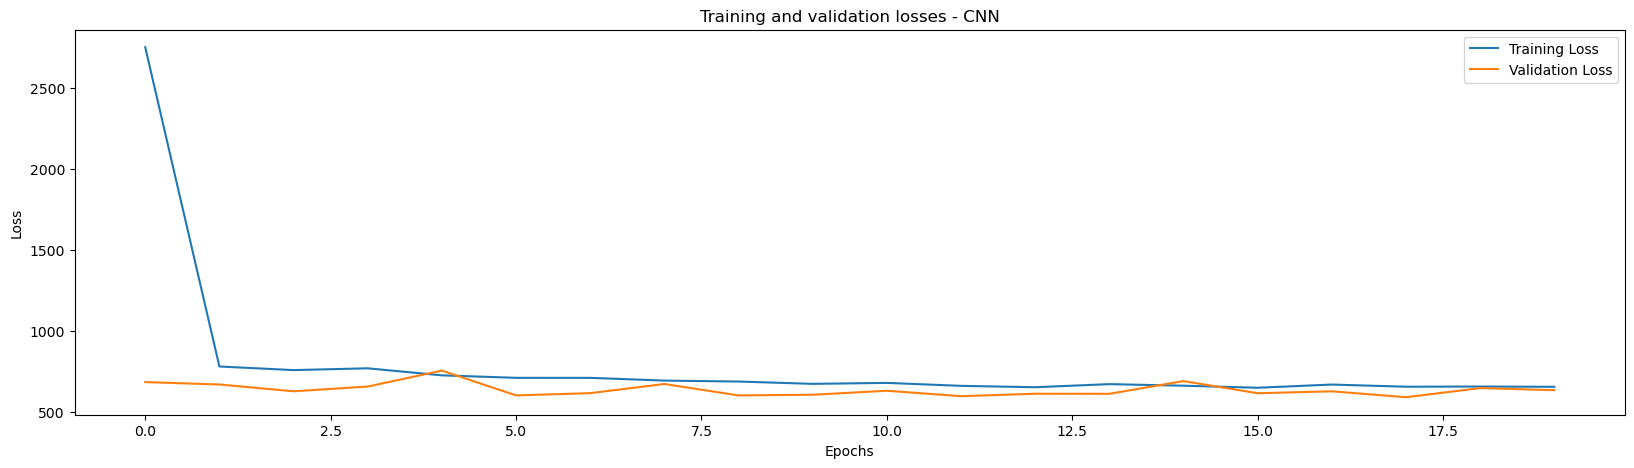

In [10]:
# # Plot validation loss
# fig, ax = plt.subplots(figsize=(20, 5))
# ax.plot(train_losses, label='Training Loss')
# ax.plot(val_losses, label='Validation Loss')
# ax.set_xlabel('Epochs')
# ax.set_ylabel('Loss')
# ax.set_title('Training and validation losses - CNN')
# ax.legend()

In [11]:
# This cell saves the averaged MSE for each timestep for 20 test simulations
model_PID.eval()
model_PID.load_state_dict(torch.load(str(src)+"/results/trained_models/cnn/CNN_PID"))

grid_size = 64
channels = 2
sim_length = 97

# Let's do a crude Monte Carlo with a single model, calculating the loss after each timestep
sims = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1/", 20, grid_size, use_augmented_data=True)
mse = np.zeros(97)

for sim in sims:

   inputs = np.zeros((1, channels, grid_size, grid_size))
   targets = sim.wd

   # Select the time step where you want to start
   id = 0

   inputs[0, 0, :, :] = sim.topography
   inputs[0, 1, :, :] = sim.return_timestep(id)
   inputs = torch.tensor(inputs, dtype=torch.float32)

   targets = torch.tensor(targets, dtype=torch.float32)
   targets[0,:,:] = inputs[0,1,:,:]

   outputs = torch.zeros(targets.shape)
   outputs[0,:,:] = inputs[0,1,:,:]

   for t in range(1, sim_length):
      outputs[t,:,:] = model_PID(inputs.to(device)).detach()
      inputs[0,1,:,:] = outputs[t,:,:]
   
   mse += mse_per_timestep(targets, outputs)

mse = mse / len(sims)

np.savetxt(str(src)+"/results/error_accumulation/CNN_PID", mse)

In [12]:
# This cell saves the averaged MSE for each timestep for 20 test simulations
model_PIDPID.eval()
model_PIDPID.load_state_dict(torch.load(str(src)+"/results/trained_models/cnn/CNN_PIDPID"))

grid_size = 64
channels = 2
sim_length = 97

# Let's do a crude Monte Carlo with a single model, calculating the loss after each timestep
sims = WaterTopo.load_simulations(str(root)+"/data/normalized_data/test1/", 20, grid_size, use_augmented_data=True)
mse = np.zeros(97)

for sim in sims:

   inputs = np.zeros((1, channels, grid_size, grid_size))
   targets = sim.wd

   # Select the time step where you want to start
   id = 0

   inputs[0, 0, :, :] = sim.topography
   inputs[0, 1, :, :] = sim.return_timestep(id)
   inputs = torch.tensor(inputs, dtype=torch.float32)

   targets = torch.tensor(targets, dtype=torch.float32)
   targets[0,:,:] = inputs[0,1,:,:]

   outputs = torch.zeros(targets.shape)
   outputs[0,:,:] = inputs[0,1,:,:]

   for t in range(1, sim_length):
      outputs[t,:,:] = model_PIDPID(inputs.to(device)).detach()
      inputs[0,1,:,:] = outputs[t,:,:]
   
   mse += mse_per_timestep(targets, outputs)

mse = mse / len(sims)

np.savetxt(str(src)+"/results/error_accumulation/CNN_PIDPID", mse)

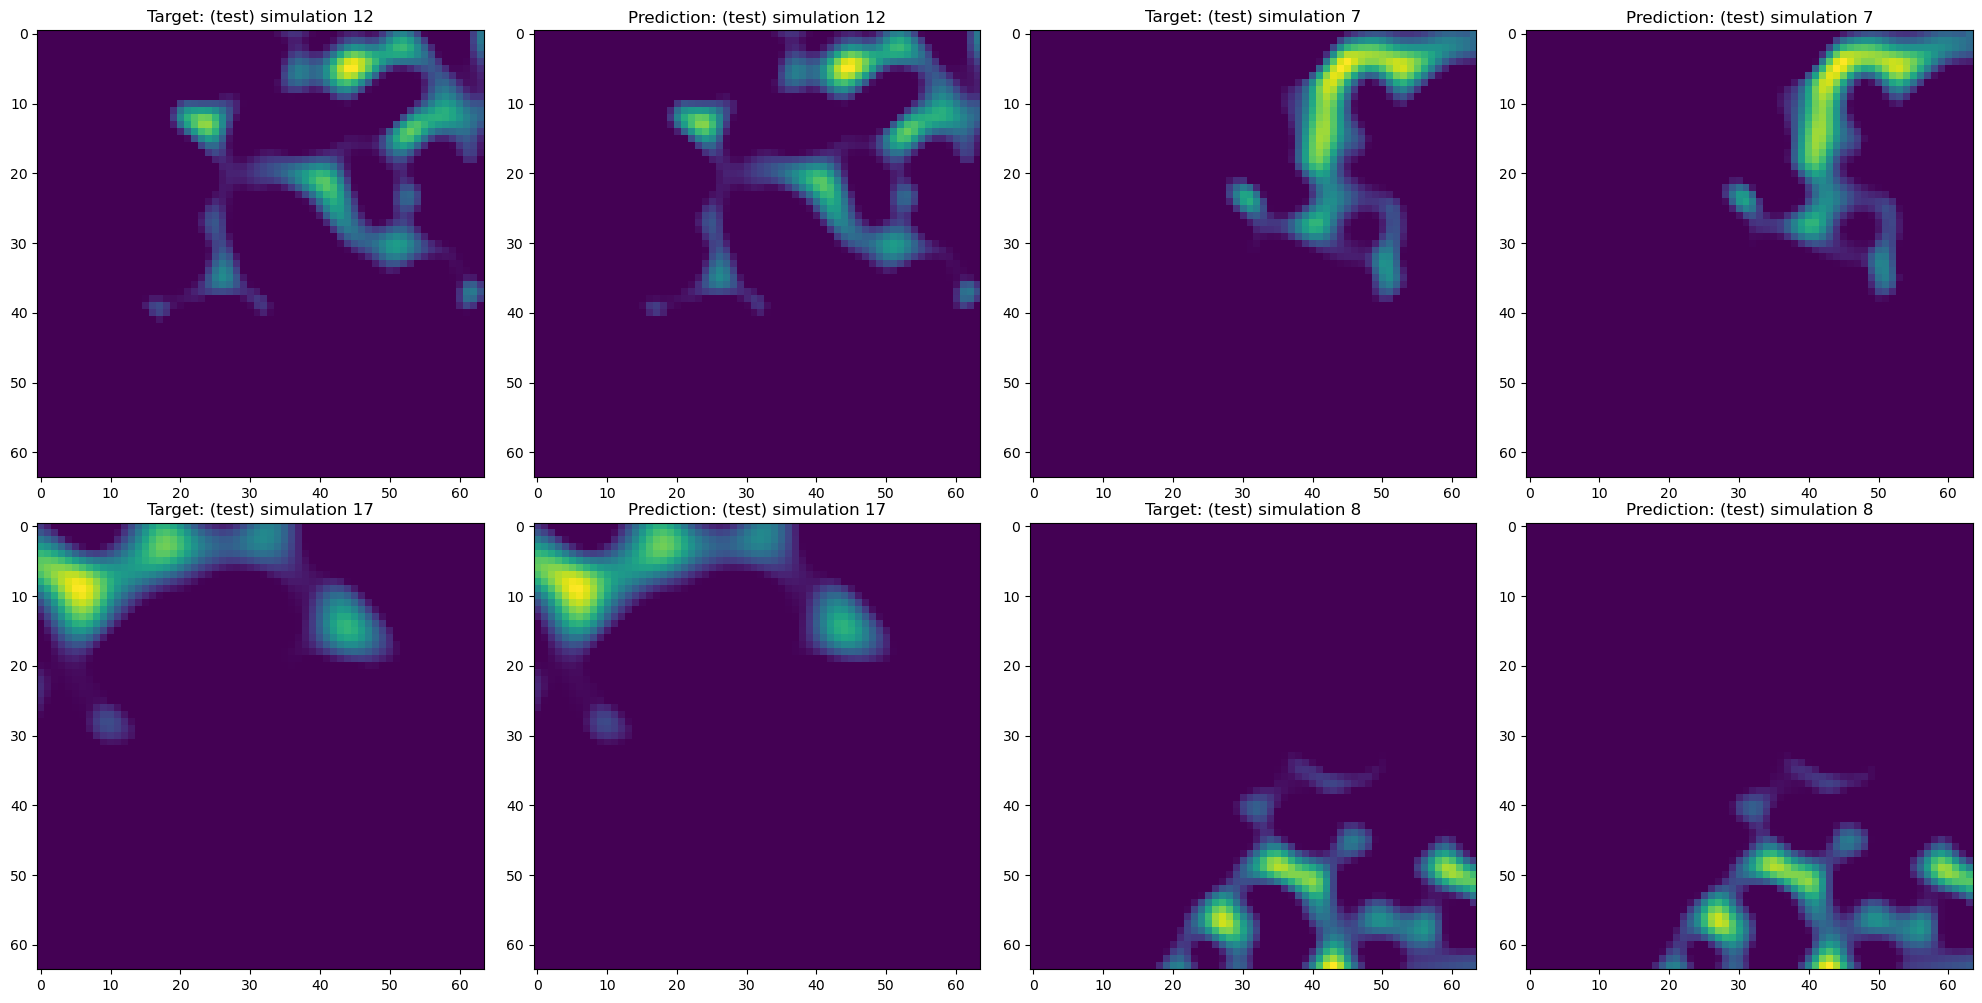

In [13]:
# Let's try the model!
model_PID.eval()

grid_size = 64
channels = 2

f,axs = plt.subplots(2, 4, figsize=(20,10))
axs = axs.reshape(-1)

for i in range(0, len(axs), 2):
  with torch.no_grad():
      # Randomly select a simulation
      random_index = random.randint(0, 80)
      sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/tra_val/", 
                                       1, 
                                       grid_size)[0]

      inputs = np.zeros((1, channels, grid_size, grid_size))
      targets = np.zeros((1, grid_size, grid_size))

      id = random.randint(0, 95)

      inputs[0, 0,:,:] = sim.topography
      inputs[0, 1,:,:] = sim.return_timestep(id)
      targets[0, :,:]  = sim.return_timestep(id+1)

      # Predict
      inputs = torch.tensor(inputs, dtype=torch.float32).to(device)
      inputs.cpu()
      prediction = model_PID(inputs).cpu()

      # Plotting inputs (time series)
      axs[i].imshow(targets[0,:,:])
      axs[i+1].imshow(prediction[0,0,:,:])

      axs[i].set_title(f"Target: (test) simulation {random_index}")
      axs[i+1].set_title(f"Prediction: (test) simulation {random_index}")

f.tight_layout()

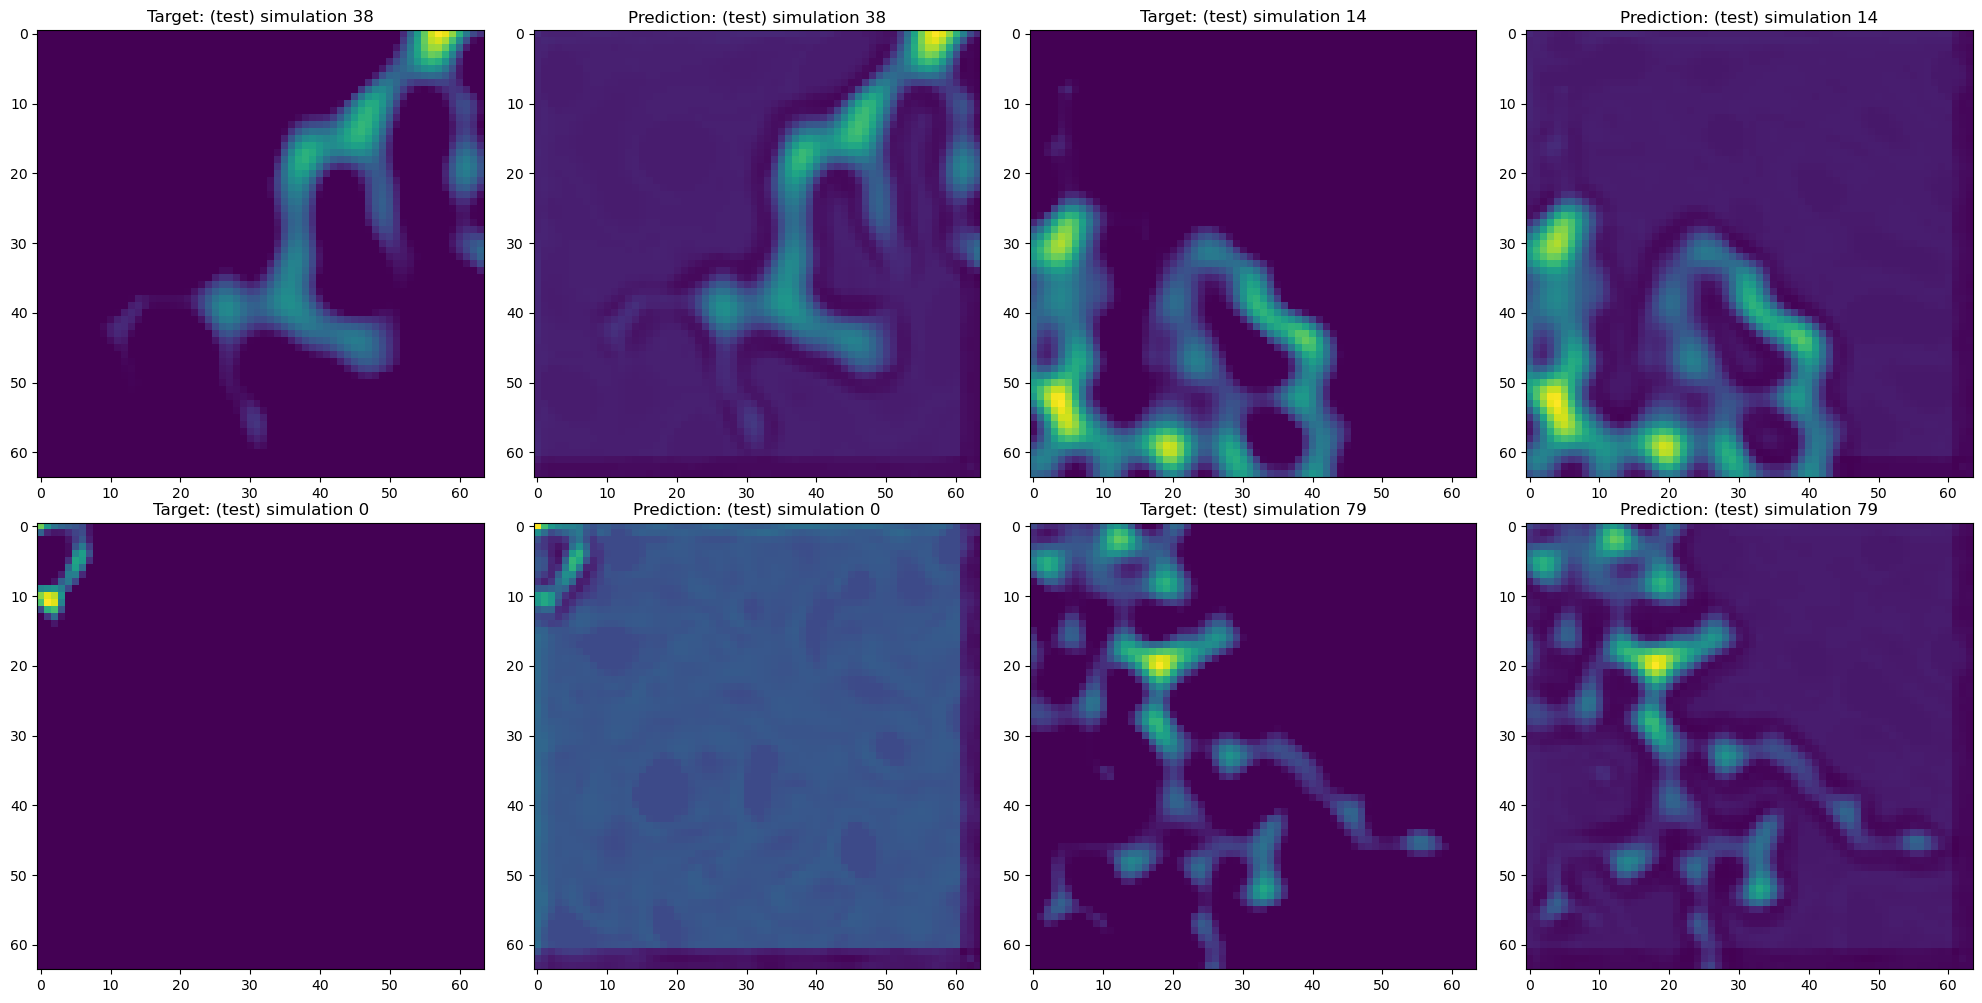

In [14]:
# Let's try the model!
model_PIDPID.eval()

grid_size = 64
channels = 2

f,axs = plt.subplots(2, 4, figsize=(20,10))
axs = axs.reshape(-1)

for i in range(0, len(axs), 2):
  with torch.no_grad():
      # Randomly select a simulation
      random_index = random.randint(0, 80)
      sim = WaterTopo.load_simulations(str(root)+"/data/normalized_data/tra_val/", 
                                       1, 
                                       grid_size)[0]

      inputs = np.zeros((1, channels, grid_size, grid_size))
      targets = np.zeros((1, grid_size, grid_size))

      id = random.randint(0, 95)

      inputs[0, 0,:,:] = sim.topography
      inputs[0, 1,:,:] = sim.return_timestep(id)
      targets[0, :,:]  = sim.return_timestep(id+1)

      # Predict
      inputs = torch.tensor(inputs, dtype=torch.float32).to(device)
      inputs.cpu()
      prediction = model_PIDPID(inputs).cpu()

      # Plotting inputs (time series)
      axs[i].imshow(targets[0,:,:])
      axs[i+1].imshow(prediction[0,0,:,:])

      axs[i].set_title(f"Target: (test) simulation {random_index}")
      axs[i+1].set_title(f"Prediction: (test) simulation {random_index}")

f.tight_layout()